In [1]:
import altair as alt
from bayes_window.generative_models import *
from bayes_window.visualization import plot_data, plot_data_slope_trials
from bayes_window import BayesWindow, models, workflow, visualization
from importlib import reload
try:
    alt.renderers.enable('altair_saver', fmts=['png'])
except Exception:
    pass

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=40,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
df['log_isi'] = np.log10(df['isi'])


# data_details with posterior slopes

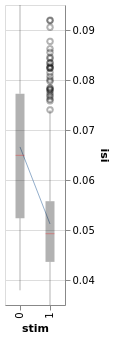

In [3]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.chart_data_box_for_detail

In [4]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',)

n(Divergences) = 35


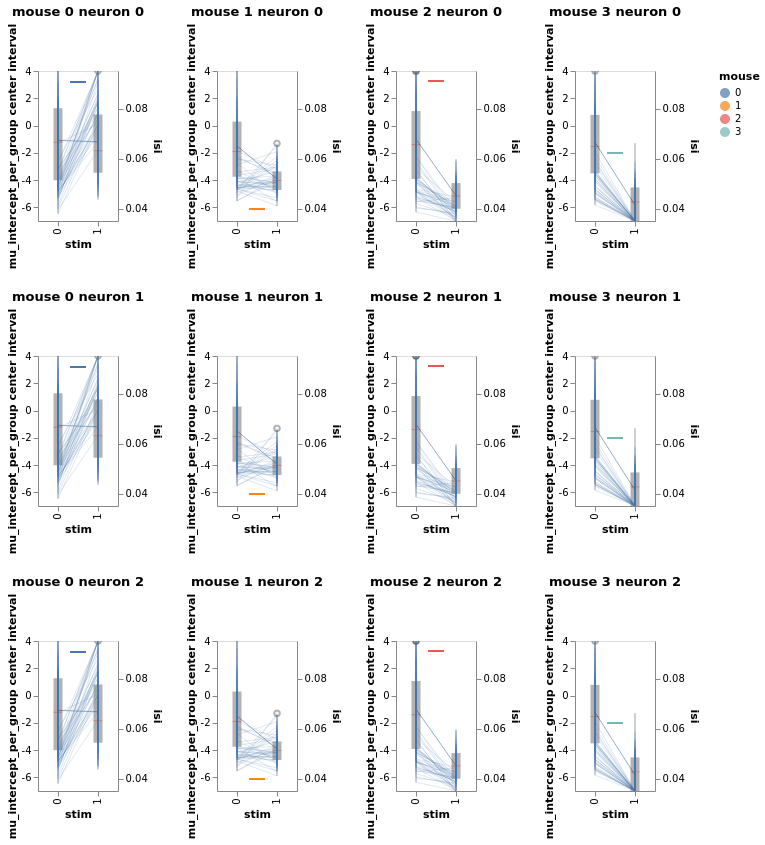

In [5]:
bw.plot_slopes_intercepts(row='neuron',column='mouse')

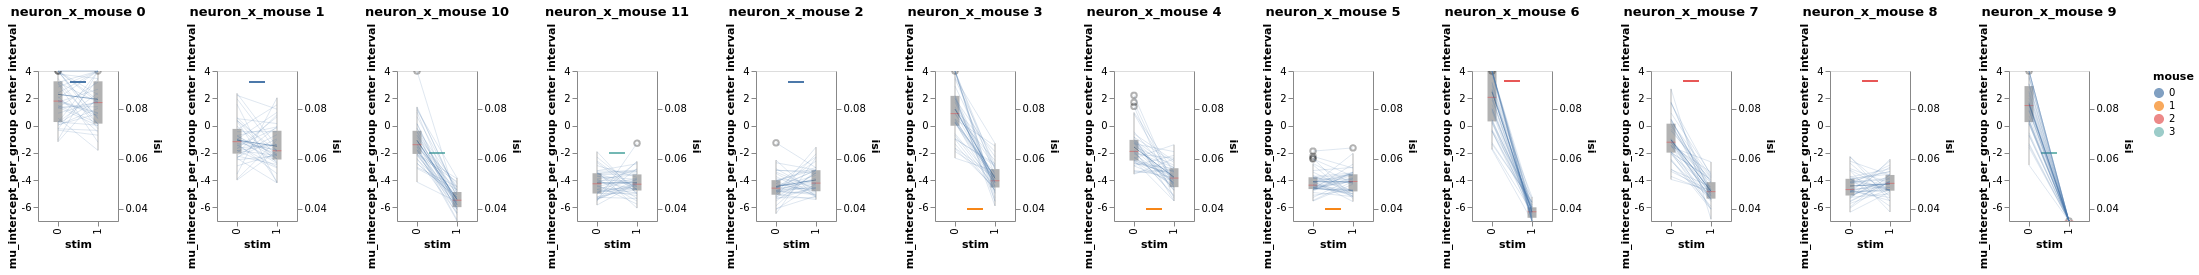

In [6]:
bw.plot_slopes_intercepts(column='neuron_x_mouse')

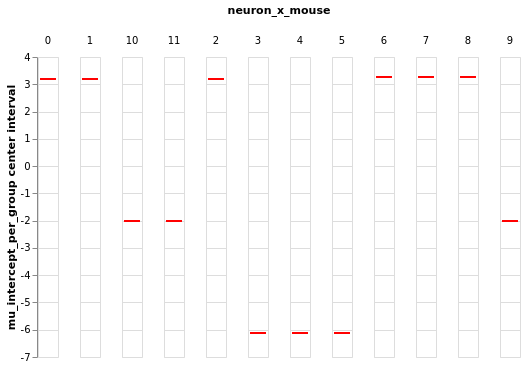

In [7]:
y='mu_intercept_per_group center interval'
posterior_intercept=alt.Chart(bw.data_and_posterior).mark_tick(color='red').encode(
    
y=alt.Y(y,
        scale=alt.Scale(domain=[bw.data_and_posterior[y].min(),bw.data_and_posterior[y].max()])
       )
)
posterior_intercept.facet(column='neuron_x_mouse')

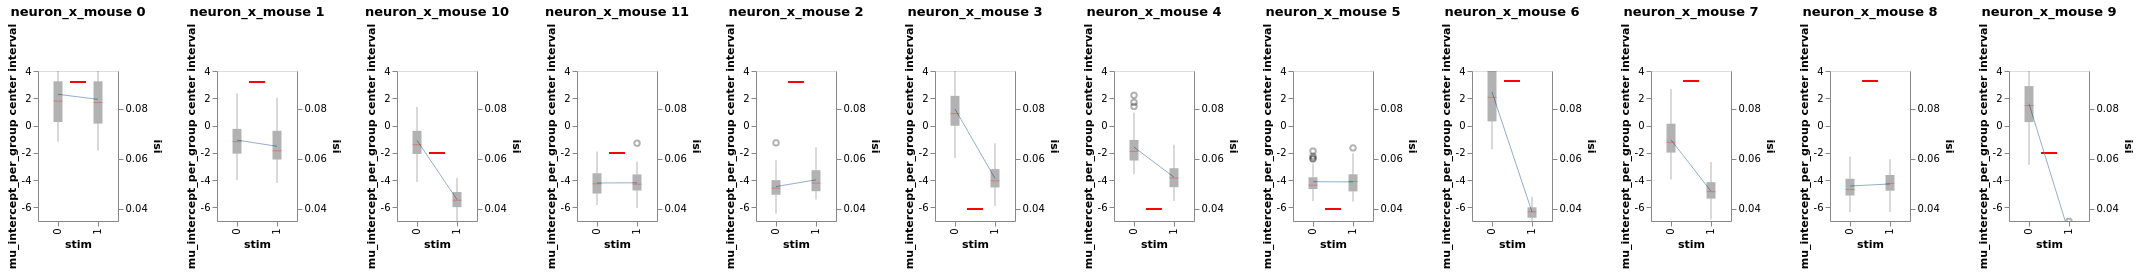

In [8]:
# Redo boxplot (no need to show)
bw.data_box_detail(data=bw.data_and_posterior,autofacet=False);

# bw.chart_data_box_for_detail.facet(column='neuron_x_mouse')

chart=(posterior_intercept+bw.chart_data_box_for_detail).resolve_scale(y='independent')
from bayes_window import visualization
visualization.facet(chart,column=bw.condition[0])

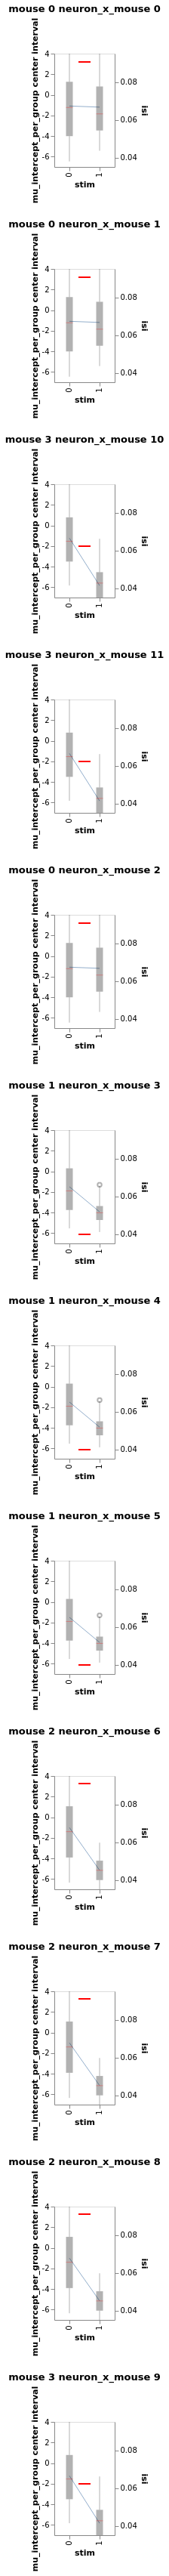

In [9]:
visualization.facet(chart, **visualization.auto_facet(bw.group, bw.condition))

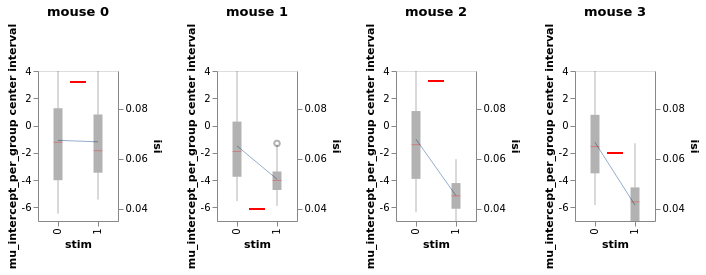

In [10]:
visualization.facet(chart,column='mouse')

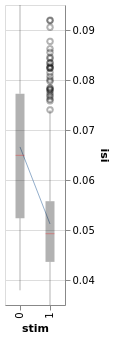

In [11]:
bw.chart_data_box_for_detail

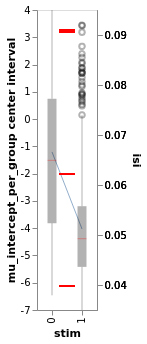

In [12]:
(bw.chart_data_box_for_detail+posterior_intercept).resolve_scale(y='independent')


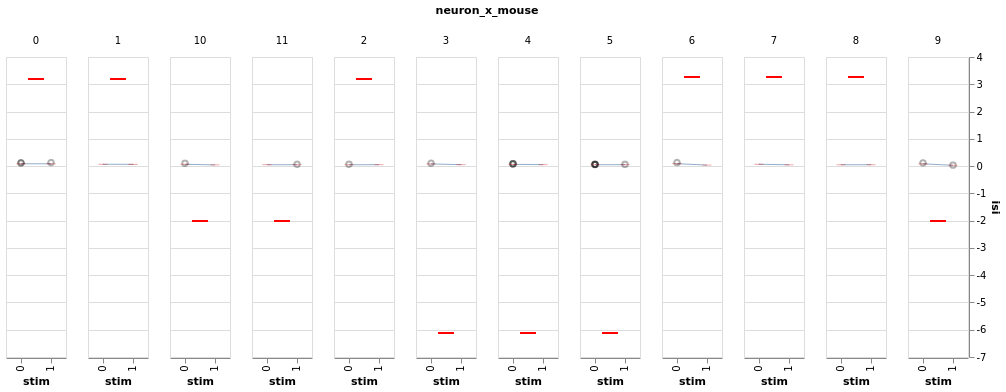

In [13]:
(bw.chart_data_box_for_detail+posterior_intercept).facet(column='neuron_x_mouse')


In [14]:
(bw.chart_data_box_for_detail+posterior_intercept).resolve_scale(y='independent').facet(column='mouse')

JavascriptError: Error: Unrecognized scale name: "child_layer_3_y"

alt.FacetChart(...)

# data_details

In [15]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

n(Divergences) = 35


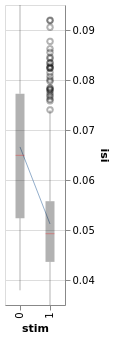

In [16]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_for_detail

# Create_data_slopes

This should trigger a warning. 'i_trial' in detail=

n(Divergences) = 35


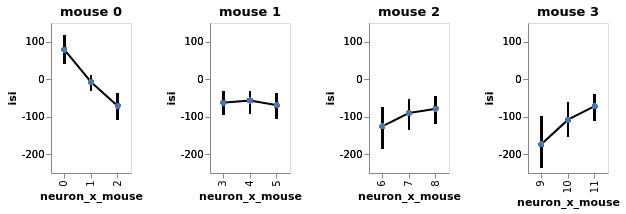

In [17]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse',));
bw.chart


No warning should be displayed below:

n(Divergences) = 35


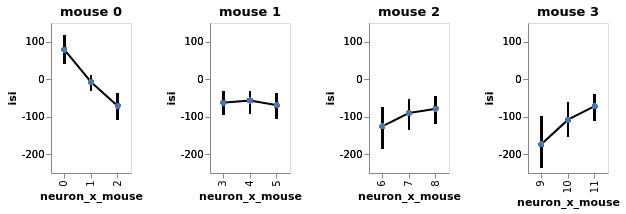

In [18]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial' )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract')

bw.chart


# data_details

In [19]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

n(Divergences) = 35


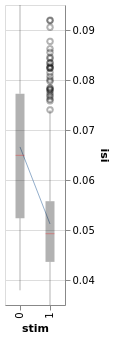

In [20]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_for_detail

## Without detail:

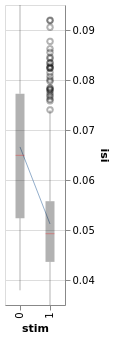

In [21]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', )
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_for_detail

# Create_posterior_charts

In [22]:
df

,i_trial,stim,mouse_code,neuron,neuron_code,mouse,neuron_x_mouse,log_firing_rate,Firing rate,firing_rate,i_spike,isi,log_isi
0,0,0,0,0,0,m0bayes,m0bayes0,1.523942,33.415070,33.415070,45.0,0.076155,-1.118304
1,0,0,0,1,1,m0bayes,m0bayes1,2.020257,104.774927,104.774927,61.5,0.057043,-1.243796
2,0,0,0,2,2,m0bayes,m0bayes2,2.113039,129.729498,129.729498,87.5,0.039586,-1.402461
3,0,0,1,0,3,m1bayes,m1bayes0,1.848961,70.625356,70.625356,45.5,0.075769,-1.120508
4,0,0,1,1,4,m1bayes,m1bayes1,2.060924,115.059910,115.059910,55.5,0.061973,-1.207796
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,39,1,2,1,7,m2bayes,m2bayes1,3.066800,1166.272869,1166.272869,78.0,0.044935,-1.347415
956,39,1,2,2,8,m2bayes,m2bayes2,2.026357,106.256902,106.256902,69.0,0.050863,-1.293594
957,39,1,3,0,9,m3bayes,m3bayes0,2.729935,536.951455,536.951455,116.0,0.029800,-1.525777
958,39,1,3,1,10,m3bayes,m3bayes1,2.524465,334.553365,334.553365,91.0,0.038273,-1.417110


In [23]:
reload(models)
reload(visualization)
reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              add_group_slope=False, center_intercept=True, center_slope=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))

n(Divergences) = 6


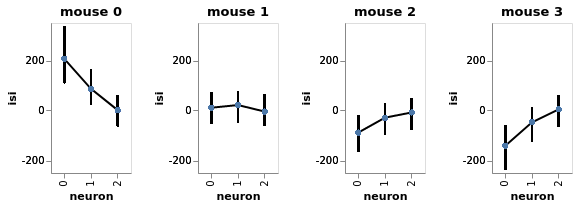

In [24]:
bw.regression_charts(x='neuron:O',column='mouse')

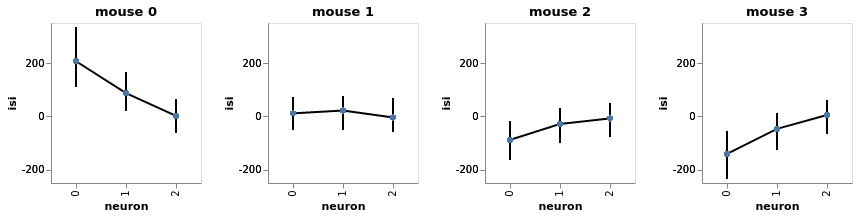

In [25]:
bw.regression_charts(x='neuron:O')
bw.facet(column='mouse')

TODO need to combine these two properly somehow

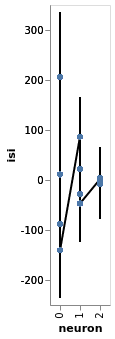

In [26]:
bw.chart

## More manual faceting and composing

n(Divergences) = 35


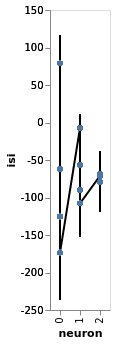

In [27]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.regression_charts(x='neuron:O')

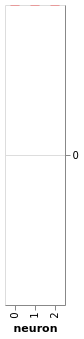

In [28]:
x='neuron'
y='isi diff'
alt.Chart(bw.data_and_posterior).mark_boxplot(
            clip=True, opacity=.3, size=9, color='black',
            median=alt.MarkConfig(color='red', strokeWidth=20)
        ).encode(
            x=x,
            y=alt.Y(f'{y}:Q',
                    axis=alt.Axis(orient='right', title=''),
                    )
        )

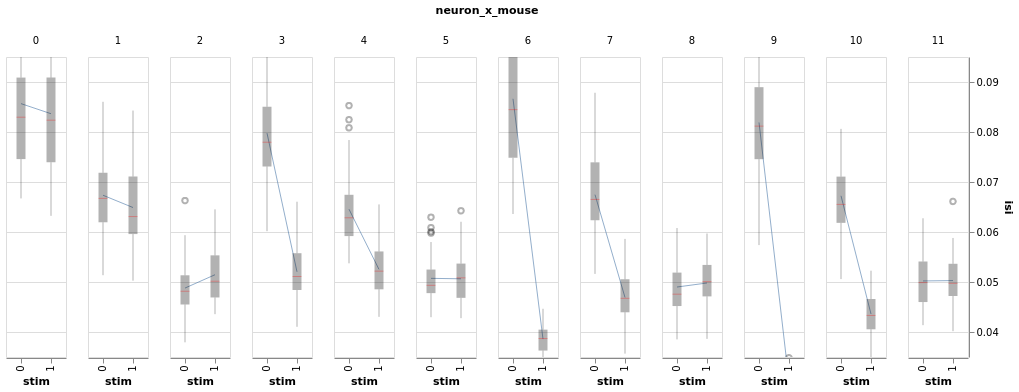

In [29]:
bw.chart_data_box_for_detail.facet(column='neuron_x_mouse')

In [30]:
(bw.chart+bw.chart_data_box_for_detail).facet(column='mouse')

JavascriptError: Error: Unrecognized scale name: "child_layer_0_y"

alt.FacetChart(...)

Fix:

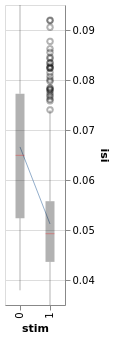

In [31]:
bw.chart_data_box_for_detail

In [32]:
bw.chart.data.head(),bw.chart_data_box_for_detail.data.head()

(   i_trial  stim  mouse_code neuron  neuron_code mouse  neuron_x_mouse  \
 0        0     0           0      0            0     0               0   
 1        0     0           0      1            1     0               1   
 2        0     0           0      2            2     0               2   
 3        0     0           1      0            3     1               3   
 4        0     0           1      1            4     1               4   
 
    log_firing_rate  Firing rate  firing_rate  ...  \
 0         1.523942    33.415070    33.415070  ...   
 1         2.020257   104.774927   104.774927  ...   
 2         2.113039   129.729498   129.729498  ...   
 3         1.848961    70.625356    70.625356  ...   
 4         2.060924   115.059910   115.059910  ...   
 
    sigma_intercept_per_group center interval  sigma_obs higher interval  \
 0                                   0.000002                   0.013339   
 1                                        NaN                        N

In [33]:
(bw.chart_data_box_for_detail + bw.chart).data

,i_trial,stim,mouse_code,neuron,neuron_code,mouse,neuron_x_mouse,log_firing_rate,Firing rate,firing_rate,i_spike,isi,log_isi,combined_condition
0,0,0,0,0,0,0,0,1.523942,33.415070,33.415070,45.0,0.076155,-1.118304,0
1,0,0,0,1,1,0,1,2.020257,104.774927,104.774927,61.5,0.057043,-1.243796,1
2,0,0,0,2,2,0,2,2.113039,129.729498,129.729498,87.5,0.039586,-1.402461,2
3,0,0,1,0,3,1,3,1.848961,70.625356,70.625356,45.5,0.075769,-1.120508,3
4,0,0,1,1,4,1,4,2.060924,115.059910,115.059910,55.5,0.061973,-1.207796,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,39,1,2,1,7,2,7,3.066800,1166.272869,1166.272869,78.0,0.044935,-1.347415,7
956,39,1,2,2,8,2,8,2.026357,106.256902,106.256902,69.0,0.050863,-1.293594,8
957,39,1,3,0,9,3,9,2.729935,536.951455,536.951455,116.0,0.029800,-1.525777,9
958,39,1,3,1,10,3,10,2.524465,334.553365,334.553365,91.0,0.038273,-1.417110,10


`alt.layer` doesnt work. Use `+`

In [34]:
alt.layer(bw.chart_data_box_for_detail,bw.chart).data

Undefined

In [35]:
from bayes_window.visualization import facet
try:
    facet(alt.layer(bw.chart_data_box_for_detail,bw.chart).resolve_scale(y='independent'), column='mouse')
except Exception as e:
    print(e)

'UndefinedType' object has no attribute 'columns'


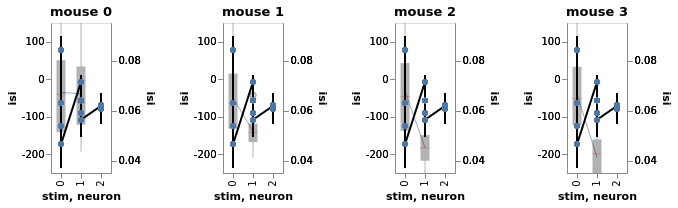

In [36]:
facet((bw.chart_data_box_for_detail+bw.chart).resolve_scale(y='independent'), 'mouse')

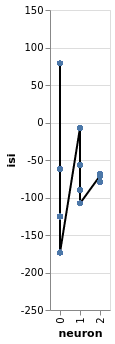

In [37]:
bw.charts[-1]

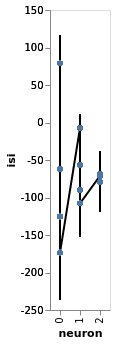

In [38]:
alt.layer(*bw.charts).resolve_scale(y='independent')

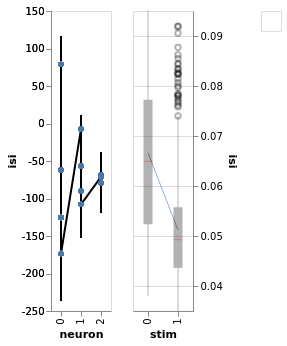

In [39]:
bw.chart|bw.chart_data_box_for_detail|bw.chart_posterior_kde

If x axis, can't use `+`. Must call `alt.layer()`:

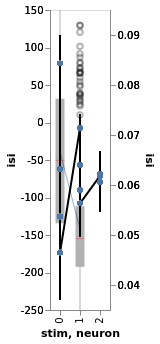

In [40]:
(bw.chart_data_box_for_detail+bw.chart).resolve_scale(y='independent')

In [41]:
# (bw.chart_data_box_for_detail+bw.chart_data_box_for_detail).facet(column='mouse').resolve_scale(y='independent')

In [42]:
alt.layer(bw.chart,bw.chart_data_box_for_detail).resolve_scale(y='independent')

JavascriptError: Error: Unrecognized signal name: "x_step"

alt.LayerChart(...)

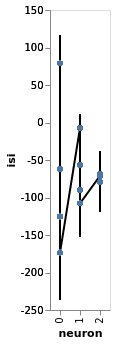

In [43]:
bw.plot(x='neuron:O')

n(Divergences) = 53


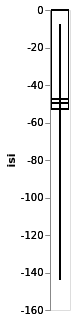

In [44]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))
bw.regression_charts()

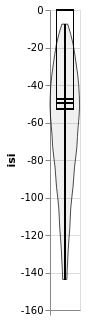

In [45]:
alt.layer(*bw.charts)

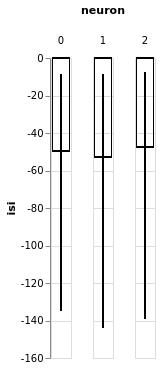

In [46]:
alt.layer(*bw.charts_for_facet).facet(column='neuron')

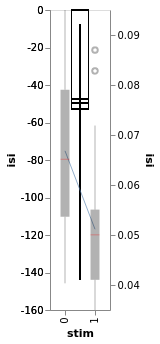

In [47]:
(bw.chart+bw.chart_data_box_for_detail).resolve_scale(y='independent')

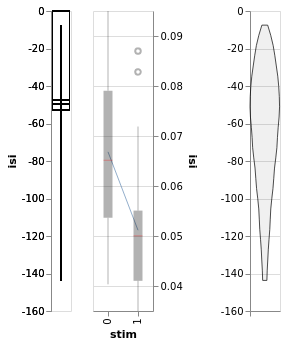

In [48]:
bw.chart|bw.chart_data_box_for_detail|bw.chart_posterior_kde

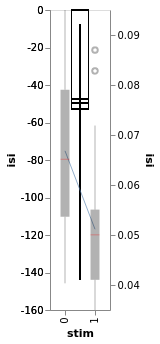

In [49]:
(bw.chart+bw.chart_data_box_for_detail).resolve_scale(y='independent')

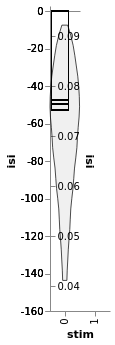

In [50]:
(bw.chart+bw.chart_data_box_for_detail+bw.chart_posterior_kde).resolve_scale(y='independent')

In [51]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
bw = BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))


n(Divergences) = 13


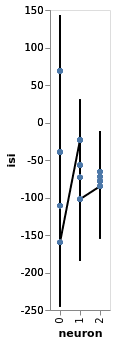

In [52]:
bw.regression_charts(x='neuron:O')

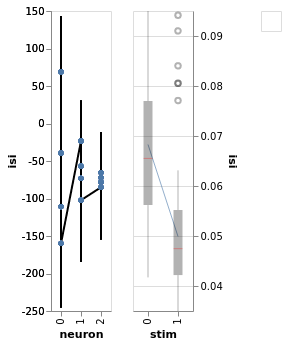

In [53]:
bw.chart|bw.chart_data_box_for_detail|bw.chart_posterior_kde

In [54]:
(bw.chart+bw.chart_data_box_for_detail).resolve_scale(y='independent')

JavascriptError: Error: Unrecognized signal name: "x_step"

alt.LayerChart(...)

In [55]:
(bw.chart+bw.chart_data_box_for_detail).resolve_scale(y='independent')

JavascriptError: Error: Unrecognized signal name: "x_step"

alt.LayerChart(...)

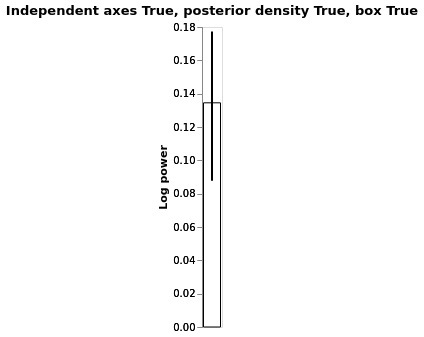

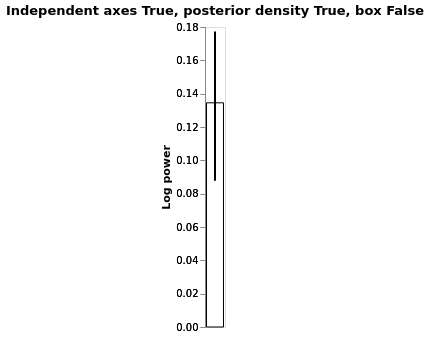

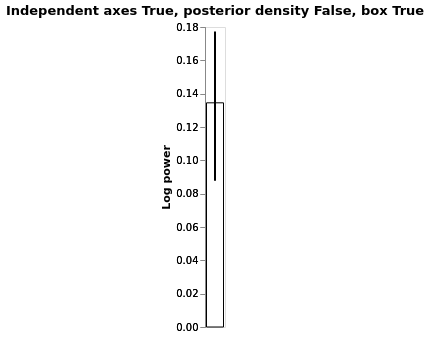

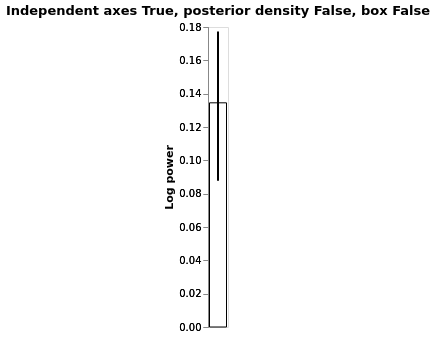

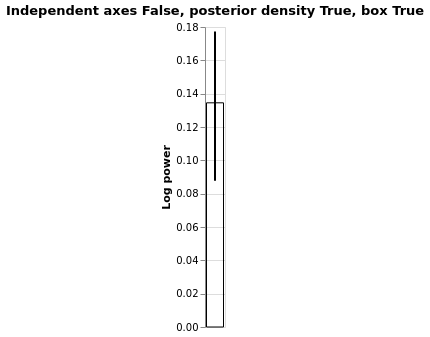

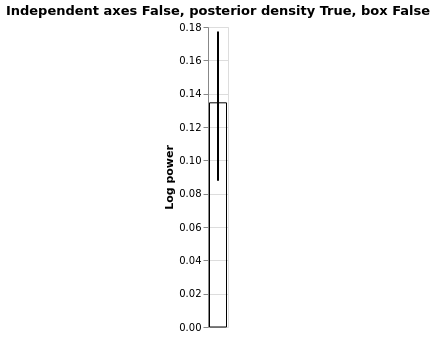

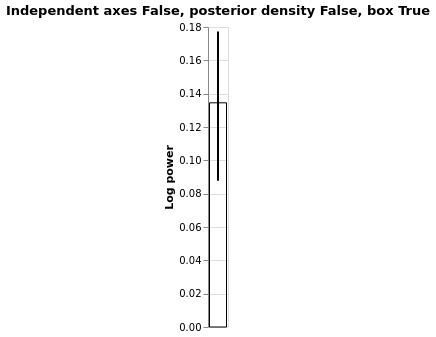

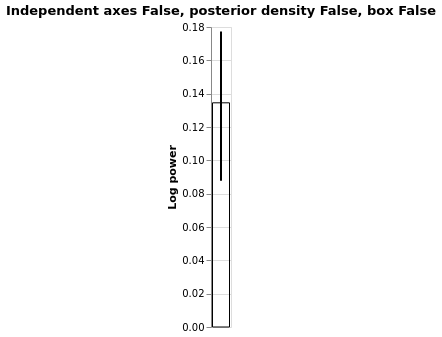

In [56]:
# Draw some fake data:
df1, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=9, n_trials=30)

# Show off all display methods:
import itertools 
# Initialize and fit again:
window=BayesWindow(df1, y='Log power', treatment='stim', group='mouse')
window.fit_slopes(model=models.model_hierarchical,add_group_slope=False,
                  do_make_change='subtract', dist_y='student');
# Plot:
for ia, ap, ab in itertools.product([True,False], [True,False], [True,False], ):
    window.plot(independent_axes=ia,x=':O',
               ).properties(title=f'Independent axes {ia}, posterior density {ap}, box {ab}').display()